What we learned before: KNN regression, model evaluation - MSE, little intuition - moving average (what is the difference?)

In [1]:
import statsmodels.api as sm
boston = sm.datasets.get_rdataset("Boston", package="MASS").data

In [2]:
X = boston[['lstat']]   # predictor - A socioeconomic feature. Higher values → neighborhoods with more lower-income residents.
y = boston['medv']      # response - Median value of owner-occupied homes (in $1000s)

In [3]:
import numpy as np
import pandas as pd


k_values = np.arange(1, 201, 5)
n = len(X)
split = n // 2
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

### Homework 2.*a*

In [ ]:
# Homework 2.a - No AI support allowed, please get the info you need from https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
  # generate an array of size split (n//2) and save the array as split_idx
  # make a new random X_train, y_train by selecting the data on the rows corresponding to split_idx
  # make a new test dataset X_test, y_test by selecting the data "not" on the rows corresponding to split_idx


In [4]:
from sklearn.neighbors import KNeighborsRegressor

# Fit KNN with k = 30
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, y_train)

# Perform prediction
fitted_values = knn.predict(X_train)

# Combine results into DataFrame
results = pd.DataFrame({'predictor_lstat': X_train.values.ravel(), 'predicted_medv': fitted_values})
print(results.head())



   predictor_lstat  predicted_medv
0             4.98       31.900000
1             9.14       23.973333
2             4.03       37.346667
3             2.94       39.670000
4             5.33       30.576667


### Homework 2.b

In [ ]:
# Homework 2.b - No AI support allowed, please get the info from google search including pythong Package APIs like https://numpy.org/doc/stable/reference/
# Without using KNeighborsRegressor, code your own Kneighborhood regression.
# You can use numpy package only. You are "not" allowed to use scikit-learn.

y_pred=[]

for x in X_test:
  distances = []        # list to store distances
  for xi in X_train:    # loop over each training point
  # in this for loop:
    # 1. compute Euclidean distance between x and xi
    # 2. append the list distances to include the above distance

  # outside of the above for loop,
  # 1. find the indices of the k smallest distances.
  # 2. predict by averaging the corresponding y values
  # 3. append y_pred to include the predicted value

# explain your code

SyntaxError: incomplete input (ipython-input-743485534.py, line 19)

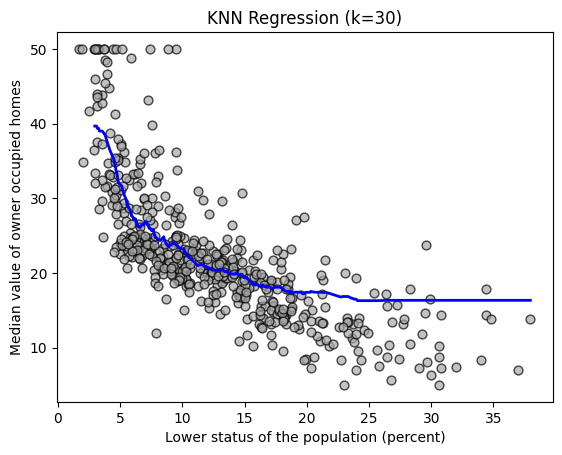

In [6]:
import matplotlib.pyplot as plt

# Scatter plot of the data
plt.scatter(boston['lstat'], boston['medv'],
            color='darkgray', edgecolor='k',
            s=40, alpha=0.7)

# Add fitted KNN line
predicted_values = knn.predict(X_test)

order = np.argsort(X_test.values.ravel())

plt.plot(X_test.values.ravel()[order], predicted_values[order], color='blue', linewidth=2)

# Labels
plt.xlabel("Lower status of the population (percent)")
plt.ylabel("Median value of owner occupied homes")
plt.title("KNN Regression (k=30)")

plt.show()

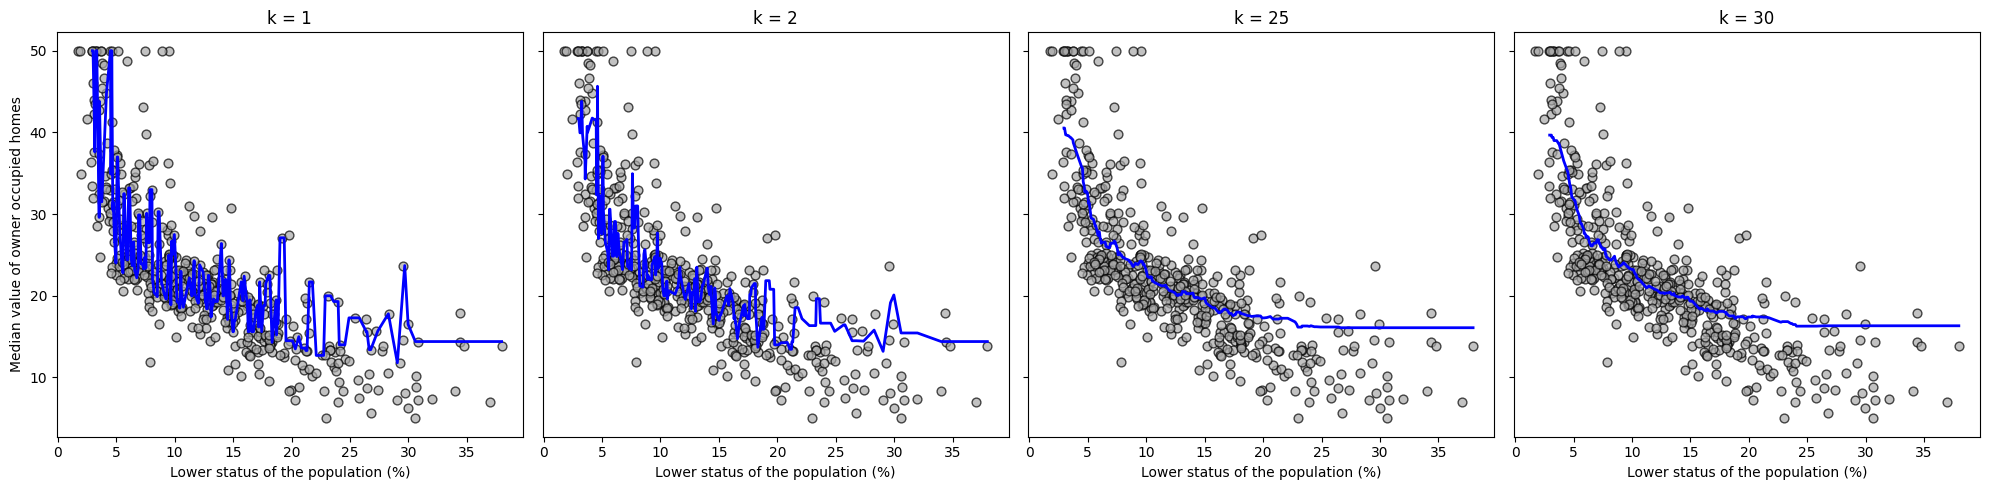

In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Different k values to try
k_values = [1, 2, 25, 30]

fig, axes = plt.subplots(1, len(k_values),
                         figsize=(5*len(k_values), 5), sharey=True)

for ax, k in zip(axes, k_values):
    # Fit model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict on grid
    y_pred = knn.predict(X_test)
    order = np.argsort(X_test.values.ravel())
    # Scatter plot
    ax.scatter(boston['lstat'], boston['medv'],
               color='darkgray', edgecolor='k',
               s=40, alpha=0.7)

    # Prediction line
    ax.plot(X_test.values.ravel()[order], y_pred[order], color='blue', linewidth=2)

    # Labels and title
    ax.set_xlabel("Lower status of the population (%)")
    ax.set_title(f"k = {k}")

# Common y-axis label
axes[0].set_ylabel("Median value of owner occupied homes")

plt.tight_layout()
plt.show()

In [8]:
k_values = np.arange(1, 201, 5)
mse_results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = np.mean((y_test-y_pred)**2)
    mse_results[k] = mse

# Show results
mse_df = pd.DataFrame(list(mse_results.items()), columns=["k", "MSE"])
print(mse_df)

      k        MSE
0     1  59.413043
1     6  39.936946
2    11  38.191606
3    16  38.392255
4    21  38.742123
5    26  39.105822
6    31  39.747143
7    36  40.943483
8    41  41.752665
9    46  42.483916
10   51  42.978890
11   56  44.257492
12   61  45.191033
13   66  46.139004
14   71  46.750057
15   76  48.177699
16   81  49.343125
17   86  50.120206
18   91  50.697955
19   96  51.521232
20  101  52.407225
21  106  53.422222
22  111  54.149147
23  116  55.108745
24  121  55.905029
25  126  56.393044
26  131  57.634921
27  136  59.243923
28  141  59.975798
29  146  61.318826
30  151  62.363687
31  156  63.297752
32  161  64.371701
33  166  65.568569
34  171  67.382916
35  176  68.573831
36  181  69.672612
37  186  71.383955
38  191  72.586611
39  196  74.218472


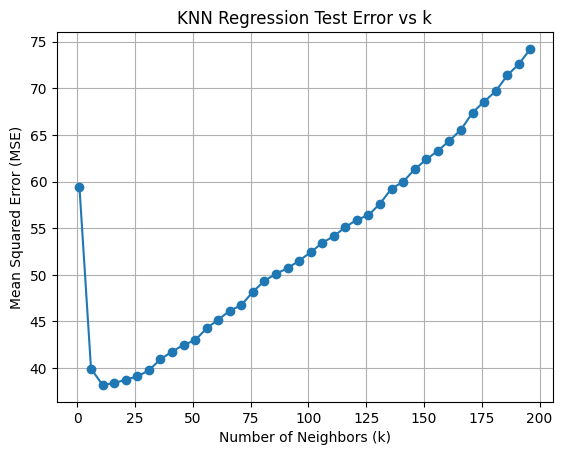

In [9]:
#plt.figure(figsize=(8,5))
plt.plot(mse_df["k"], mse_df["MSE"], marker="o", linestyle="-")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("KNN Regression Test Error vs k")
plt.grid(True)
plt.show()

In [10]:
N=200
xgrid = np.linspace(0, 1, N)#.reshape(-1, 1)
noise = np.random.normal(size = N)
y = - 4* xgrid **2 +  4* xgrid + noise

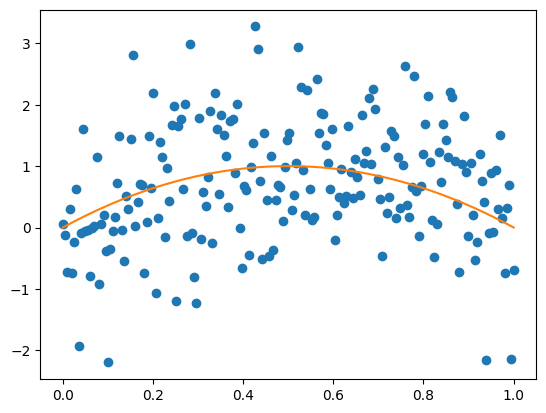

In [11]:
plt.plot(xgrid, y, 'o')
plt.plot(xgrid, y-noise)

In [12]:
def data_giver(N=200):
  #N=200
  xgrid = np.linspace(0, 1, N)#.reshape(-1, 1)
  noise = np.random.normal(size = N, scale=1)
  y = - 4* xgrid **2 +  4* xgrid + noise
  return xgrid, y, noise

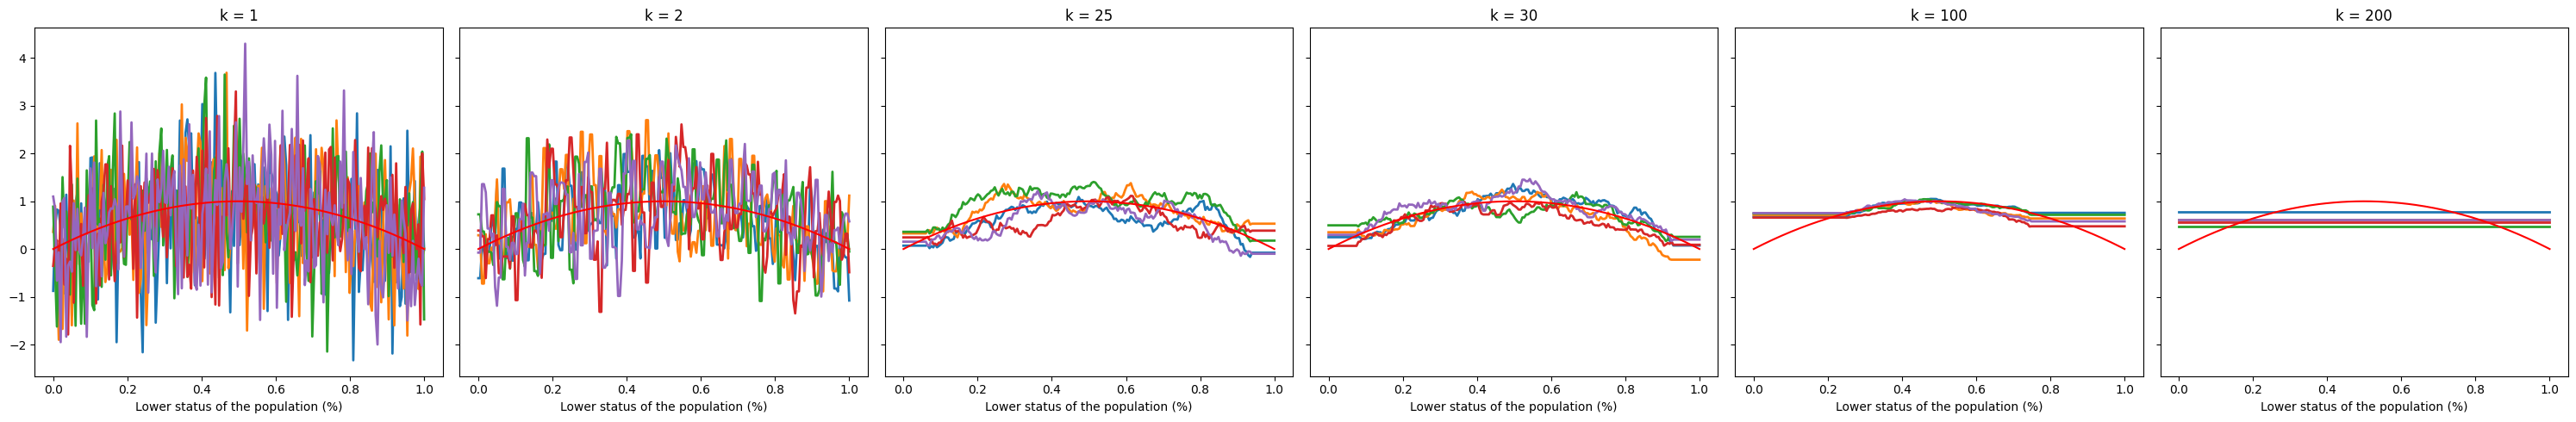

In [13]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Different k values to try
k_values = [1, 2, 25, 30,100,200]

fig, axes = plt.subplots(1, len(k_values),
                         figsize=(5*len(k_values), 5), sharey=True)

for ax, k in zip(axes, k_values):
    for repeat in range(5):
        # Generate data
        xgrid, y, noise = data_giver()
        # Fit model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(xgrid.reshape(-1,1), y)

        # Predict on grid
        y_pred = knn.predict(xgrid.reshape(-1,1))
        ax.plot(xgrid, y_pred, linewidth=2)

    # Labels and title
    ax.set_xlabel("Lower status of the population (%)")
    ax.set_title(f"k = {k}")
    ax.plot(xgrid, y-noise, color="red")

# Common y-axis label
#axes[0].set_ylabel("Median value of owner occupied homes")

plt.tight_layout()
plt.show()

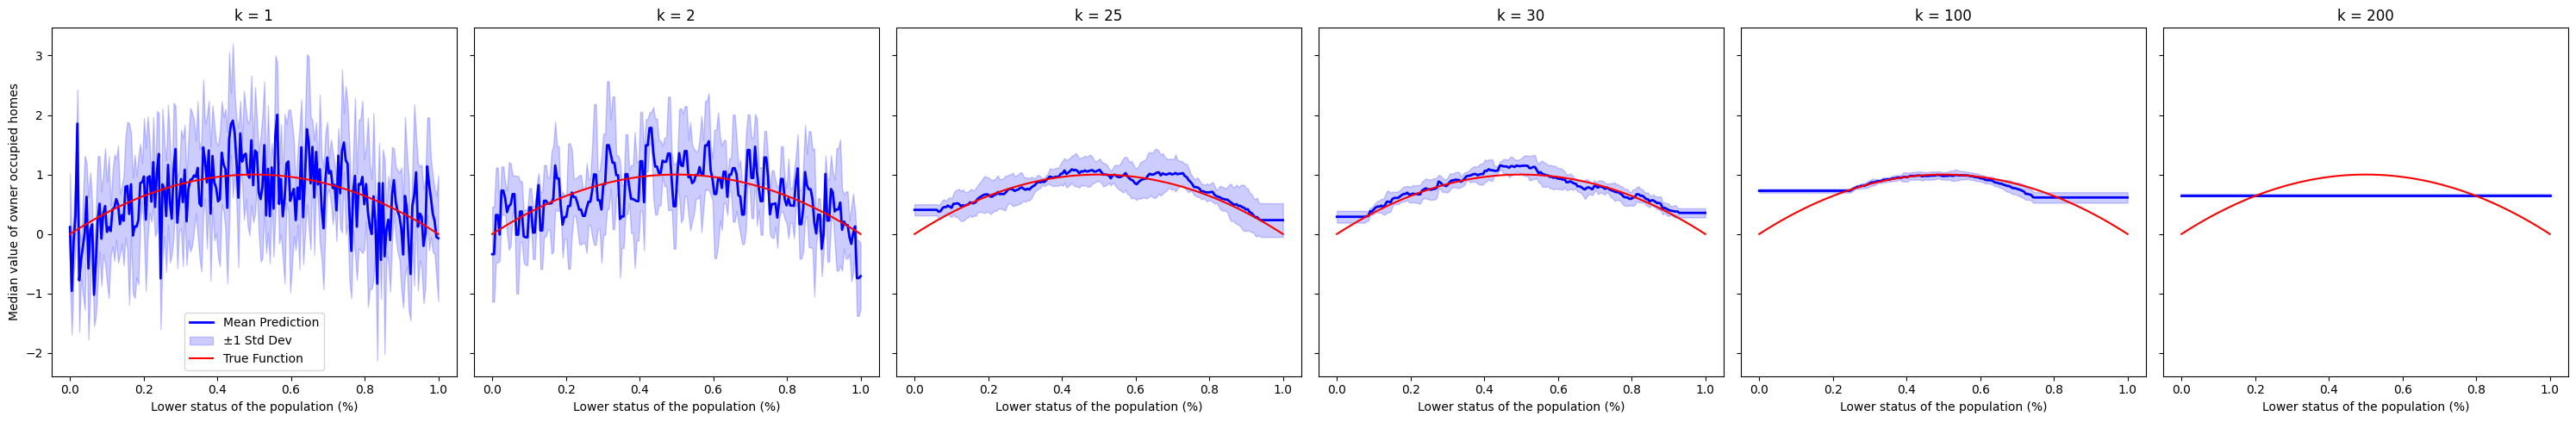

In [14]:
fig, axes = plt.subplots(1, len(k_values),
                         figsize=(5*len(k_values), 5), sharey=True)

for ax, k in zip(axes, k_values):
    predictions = []

    for repeat in range(5):
        # Generate data
        xgrid, y, noise = data_giver()

        # Fit model
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(xgrid.reshape(-1,1), y)

        # Predict on grid
        y_pred = knn.predict(xgrid.reshape(-1,1))
        predictions.append(y_pred)

    # Convert to numpy for easier statistics
    predictions = np.array(predictions)  # shape (repeats, n_points)
    mean_pred = predictions.mean(axis=0)
    std_pred = predictions.std(axis=0)

    # Plot mean line
    ax.plot(xgrid, mean_pred, color="blue", linewidth=2, label="Mean Prediction")

    # Plot variance as transparent band
    ax.fill_between(xgrid,
                    mean_pred - std_pred,
                    mean_pred + std_pred,
                    color="blue",
                    alpha=0.2,
                    label="±1 Std Dev")

    # Plot true underlying function
    ax.plot(xgrid, y - noise, color="red", label="True Function")

    # Labels and title
    ax.set_xlabel("Lower status of the population (%)")
    ax.set_title(f"k = {k}")

# Common y-axis label
axes[0].set_ylabel("Median value of owner occupied homes")
axes[0].legend()

plt.tight_layout()
plt.show()